In [4]:
#install.packages('forecast')
#install.packages('urca')
suppressMessages(library(tseries))
suppressWarnings(library(Quandl))
suppressWarnings(suppressMessages(library(forecast)))
library(urca)

##### $Nota:$ el siguiente documento desciende de *jupyter*, popular editor que permite codificaciòn, ecuaciones LaTex y escritura de texto. <br>Para no abrumar el lector con còdigo se ha cortado parte de éste, sin embargo en este mismo fichero zip se hayan los notebook <br>original que contienen el còdigo. Adèmas a fines didacticos se implementò Python para la comprobaciòn de algunos resultados.
<br>

##### El fichero zip  contienen 3 aportes: Act1EFStorra (Tarea), Jupyter R (Còdigo R) y Jupyter Python (Còdigo Python)

# $$Econometria$$ $$Financiera$$
<br>

**Objetivos de la tarea: <br>La primera parte consiste en realizar una propuesta de modelización sobre dos series.<br> La segunda parte consiste en comparar los modelos propuestos con la funciòn $auto.arima$ de Hyndman**

## Introducciòn y propuesta de la series
La metodologia para el anàlisis de las series serà la comùnmente conocida $Metodologia$ $Box-Jenkins.$ <br>
La modelizaciòn serà llevada a cabo con modelos **𝐴𝑅𝐼𝑀A** o sea, modelos autoregressivos integrados de médias mòbiles.<br>
En particular se implementarà el modelo Arima general estacional. <br>
Tal modelo se especifica como: 

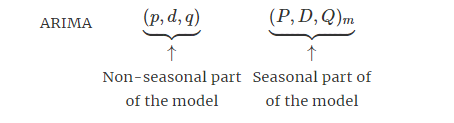


<br>Donde:
<br>$p$ es el número de términos autorregresivos,<br> $d$ es el número de diferencias regulares,<br> $q$ es el número de orden de mediàs mòbiles regular.<br>



<br>$P$ es el número de términos autorregresivos estacionales,<br> $D$ es el número de diferencias estacionales,<br> $Q$ es el numero de orden de mediàs mòbiles estacional.<br>

$m$ hace referencia al numero de observaciones en el año, en nuestro caso porque usaremos datos mensiles $m=12$

## Procedimiento

Procederemos en **3 fases** màs una 4°. Resumimos el proceso como sigue:<br>

> **<font color='navy'> $1.$ IDENTIFICACION DE LA SERIE </font>** 
<br>
>> **$1.1$ GRAFICAR**. <br>El objetivo es hacer un Plot de la serie original para analizar *at glance* la data.<br> Aquì deberemos observar si en los datos identificamos tendencia, varianza o componente ciclica. <br> 
**$1.2$ TRANSFORMAR**. <br>Una vez advertido comportamientos *no estacionarios* en la serie, realizaremos manipulaciones sobre nuestra data. <br>Nos preguntamos por qué manipular la serie original?<br> La respuesta: *tendecia* y *estacionalidad* influyen en el valor que la serie asume en el tiempo. <br> Necesitamos que la serie *orbite* entorno a una media y que la varianza sea constante.<br>En particular aplicaremos:<br> *Logaritmo* $\rightarrow $ *ESTABILIZAR LA VARIANZA*
    <br> *Diferenciaciòn* $\rightarrow$ *ESTABILIZAR LA MEDIA* (hace estacionaria la serie)<br>
    
  >>**$1.3$ EXAMINAR.**<br> El proposito serà encontrar candidatos adecuados una vez constatado que la serie es estacionaria mediante test de raìz unitaria.<br> 
    >>>$1.3.1$ En concreto analizaremos realizaremos los test de *Dickey-Fuller*, *PhillipsPerron* y el *KPSS* **(Pruebas Formales)**.<br> 
    >>>$1.3.2$ La **PACF** y la **ACF**, o sea el grafico de la funciòn de autocorrelaciòn parcial y la funciòn de autocorrelaciòn decidiremos los ordenes del modelo.<br>
    
    
Nos preguntamos que ARIMA$(p,d,q) \times(P,D,Q)$ es el màs adapto? Qué orden tiene la parte autorregresiva, etc.?


> **<font color='navy'>$2.$ ESTIMACION DE LOS PARAMETROS. </font>**
<br> 
>>**$2.1$ ESTIMAR** <br> El proposito serà estimar entre posibles candidatos los parametros y analizar su significacia.<br>
Importante, también en esta fase es, verificar las **condiciones** de **<font color='darkorange'>estacionaridad</font>** e **<font color='darkorange'> invertibilidad</font>**. <br>Tales condiciones dependeràn del orden $p$, $q$, $P$, $Q$ en el modelo.


> **<font color='navy'>$3$. DIAGNOSTICO DEL MODELO</font>** <br> 
>>**$3.1$ SELECION**<br> Una vez llevada a cabo la estimaciòn procederemos a la selecciòn del modelo.<br> Aquì hemos de verificar tramite el $AIC$ el mejor candidato y una vez escogido comprobar tramite test si sus residuos se distribuyen segùn un *ruido blanco.* **(White Noise)**<br> 

> $4.$ El **<font color='red'>cuarto</font>** paso serà simplemente comparar el modelo escogido con el modelo sugerido a través de la funciòn **<font color='navy'>auto.arima</font>**.<br>

### Base de datos

La series propuestas son:
* **Euronext Rodgers International Commodity Index (RICI)** $\rightarrow $ (financiera) 
* **Producer Price Index, Commodities: Motor vehicles (MOTOR)** $\rightarrow$ (macro)

### Identificaciòn
* Identificaciòn de la serie RICI

#### 1.1 Graficaciòn 

In [ ]:
#rici2 <- read.csv('RICI-RICI.csv')
rici2 <- Quandl("RICI/RICI", api_key="Yi6T5LfRzWmJs_hU6Zw1", collapse="monthly") 
serie <- rev(rici2$Value)
serie <- ts(serie,start=c(1998, 8),frequency=12, end=c(2021,3)) # Periodo considerado
head(serie, 29);tail(serie, 15)
plot(serie, main = 'Rodgers International Commodity Index', type='l', col='navy')

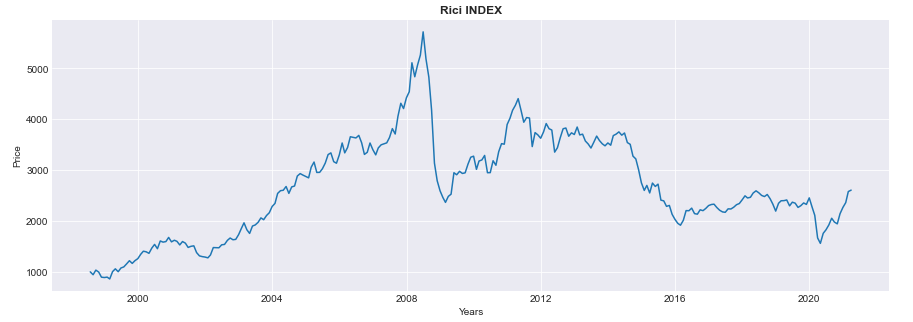

Como podemos ver la serie considerada inicia en Agosto del 1998 y acaba en Marzo del 2021.<br>

*At glance* se notan unos cuantos desplomes:
<br>

<font color='red'>$2008$</font> $\rightarrow$Poco antes del 2010, tal caìda se debe a la crisis financiera global y a la quiebra de Lehman Brothers.<br> El contagio pasò a continente Europeo poco después.
<br>
<font color='red'>$2013 - 2014$</font> $\rightarrow$ Tal desplome no es inmediato pero el mercado tuvo una tendecia a la baja hasta el 2015.
<br>
<font color='red'>$2020$</font> $\rightarrow$ Tal desplome hace referencia a la actual pandemia ocasionada por la **COVID-19**.<br> Aunque cabe decir que los ingentes planes de ayudas econòmicos lograron una rapida confianza en los mercados, causando un repunte en los mismo.

<br>
Variaciones significativas en la serie gustificarìan la aplicaciòn del <font color ='green'>$logaritmo$</font> neperiano para estabilizar la varianza.<br>
Sin embargo, tal transformaciòn no resuelve el problema de la estacionaridad como se observa en el <font color ='green'> $grafico$ $(A)$</font> a continuaciòn.<br> 

Para resolver el problema de la **no estacionariedad** procedemos a <font color='purple'>diferenciar</font> la serie, como muestra el **grafico (B)**.<br> 
Hay que aclarar que cuando ambas las diferencias; bien sea la 1° diferencia que la diferencia estacional se aplican,<br> no importa el orden en el cual las llevemos a cabo.<br>Por otro lado, si la serie tiene una fuerte componente estacional, Hyndman recomienda que la diferenciaciòn estacional se lleve a cabo por primero.<br> 

El motivo: la difenciaciòn estacional a veces estacionarà la serie y no se necesitarà también la otra primera diferencia.<br> Por el contrario, si se llevase a cabo *in primis* la primera diferencia, la estacionalidad seguirìa presente. Como regla queda claro que:
* Si hay un evidente y consistente patròn estacional deberìa aplicarse una diferenciaciòn estacional<br> pero no màs de dos diferenciaciones totales, o sea diferenciaciòn estacional + diferenciaciòn regular.

#### 1.2 Transformaciòn

In [ ]:
serie1 <- diff(diff(log(serie), 12))
head(serie1, 28)

####### PLOTTING NEW TRANSFORM SERIE###
par(mfrow=c(1,2))
plot.ts(log(serie), main = 'Logaritmo de la serie (A)', col ='steelblue')
plot.ts(diff(diff(log(serie), 12)),
        main = 'Estacionariedad (B)', col =' steelblue')
abline(h = 0, col ='red', lwd = 3)

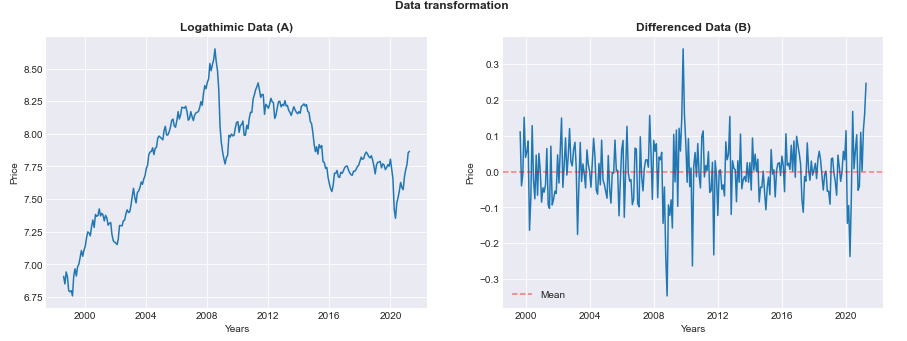

Cabe aun mencionar que en general es mucho màs arriesgado considerar como estacionaria una
serie que no es estacionaria,<br>que considerar como no estacionaria una
serie que es estacionaria.
<br> De hecho, en caso de sobrediferenciar tendriamos:

1) Pequeña perdida de eficiencia en la estimación. <br>
2) La varianza de los errores de predicción son mayores.<br>

Por otro lado si estimamos un modelo para una serie no estacionaria: <br>
1) El modelo no es robusto y no puede adaptarse a valores futuros<br>
2) El error depredicción crece con el horizonte temporal y las varianzas están subestimadas. 
<br>
##### Es siempre preferible la sobrediferenciaciòn.

#### 1.3 Examinaciòn
**1.3.1 Pruebas Formales** <br>
En la fase de examinaciòn usamos las pruebas formales, tales pruebas hacen referencia a los test **Dickey-Fuller**, **Philipps-Perron** y **KPSS.**<br>
El objetivo es determinar si la serie sobre la cual vamos a modelizar es estacionaria o no.
<br>
Para *Dickey-Fuller* y *Philipps-Perrons* tenemos que: <br>$H_0:$ El proceso contiene una raìz unitaria. <br>$H_1:$ El proceso es estacionario.
<br> Si rechazamos la hipòtesis nula, aceptaremos que la serie es estacionaria y continuaremos la estimaciòn.
<br>

Por otro lado la prueba de Kwiatkowski-Phillips-Schmidt-Shin se utilizan para probar una hipótesis nula<br> de que una serie temporal observable es estacionaria frente a la alternativa de una raíz unitaria.<br> O sea el contrario:
<br> $H_0:$ El proceso es estacionario.<br>$H_1:$ El proceso contiene una raìz unitaria.<br>
Aqui deberemos **NO** rechazar la hipòtesis nula, asumiendo estacionariedad de la serie.<br>
<br>Los tres test muestran lo siguiente:

|$Prueba$|$Test$ $Statistic$|P-value|$H_0$: The process contains a unit root|
|------|--------------|-------|------|
|Dickey-Fulley|-13.0302|0| Rechazada -Rejected|
|PhillipsPerron|-13.2711|0|Rechazada -Rejected|

|$Prueba$|$Test$ $Statistic$|P-value|$H_0$: The process is stationary|
|------|--------------|-------|------|
|KPSS| 0.0323|0.855|No rechazada - Not rejected|

Rechazamos ya sea la $H_0$ de Dickey-Fuller que de Philipps-Perron, mientras que **NO** rechazamos en el caso de KPSS.<br>
Como podemos observar en los tres test *serie1* pasa la prueba con lo cual hemos logrado estacionarizar <br>la serie con una transformacion log, una primera diferencia y una diferencia estacional.<br>

In [ ]:
summary(ur.df(serie1, type = 'none',  lags = 0))
summary(ur.pp(serie1, type = 'Z-tau', lags = 'short', model = 'constant'))
summary(ur.kpss(serie1, type = 'tau', lags = 'short'))

#### 1.3.2 ACF & PACF
En esta fase del analisi nos enfocamos en la *autocorrelation function* (ACF) y *parcial autocorrelation function* (PACF).<br>
El objetivo en la graficaciòn de la ACF y PACF es **determinar** los ordenes **𝐴𝑅** y **𝑀𝐴** del modelo, tanto regulares como estacionales.<br>
En particular, los ordenes se determinan a partir de la significaciòn de los lags en los plots.<br>
En otras palabras, dado un nivel de significancia <font color='navy'>*(las bandas en azul)*</font>, el nùmero de *palos* que sobresale dichos umbrales,<br> nos indicarìa el nùmero de orden del modelo, ya sea en la parte regular que en la parte estacional.
<br>

Por ejemplo, si nos encontraramos delante un $𝐴𝑅𝐼𝑀𝐴(0,0,0)\times(0,0,1)_{12}$, deberiamos observar:
* Un **pico** significativo en el **lag 12** pero ningun otro *sobresaliente* en el **ACF** plot.
* Un **decaemiento** exponencial en los lags 12, 24, 36, etc... del **PACF**.<br>

Por el contrario, para observar un $𝐴𝑅𝐼𝑀𝐴(0,0,0)\times(1,0,0)_{12}$ tendriamos un pico en el lag 12 PACF y decaemiento en los lags estacional del ACF.<br>

**El procedimiento para modelar la parte regular es similar, solo que tendriamos en consideraciòn los primeros lags del ACF y PACF.**<br>

**Entonces, para la serie RICI:**

In [ ]:
############ PLOTTING ACF AND PACF  ##########
par(mfrow =c(1,2))
Acf(diff(diff(log(serie),12)), 
    main = 'ACF PLOT RICI')

Pacf(diff(diff(log(serie), 12)),
     main = 'PACF PLOT RICI')

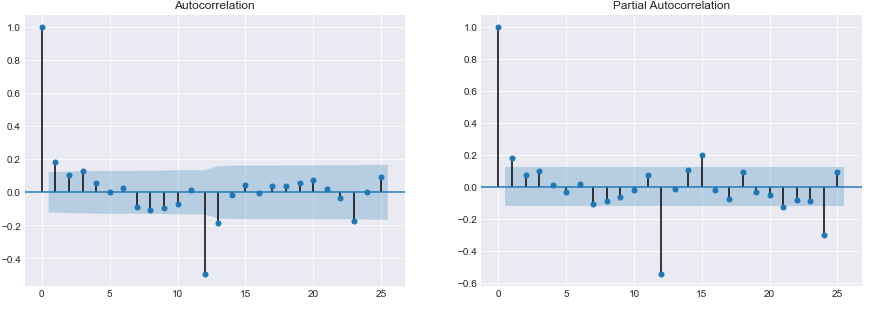

Como podemos ver hay una evidente significaciòn en los lags 1 y 12 de la ACF y PACF màs otro significativo en el lag 24 de la PACF.
### 2 $Estimaciòn$

**$2.1$ Estimaciòn**<br> Proponemos los tres siguientes modelos:

In [9]:
p_values <- function(x){
    x = pnorm(c(abs(x$coef)/sqrt(diag(x$var.coef))), mean = 0, sd=1, lower.tail = FALSE)
    return(t(x))
} # Funcion para los p valores de los modelos

In [ ]:
mod4<- Arima(serie, order=c(1,1,0),
             seasonal = c(0, 0, 1), lambda = 0)
mod4
p_values(mod4)
checkresiduals(mod4)

$Model$ $4$
$$𝐴𝑅𝐼𝑀𝐴(1,1,0)(0,0,1)[12]$$

|--|$ar1$| $sar1$  |
|--|---|------|
|**Parametros**|   0.1821 | -0.1469 | 
|s.e. |0.0597 |  0.0645  | 
|**p-values**|0.001141251	|0.0113592|	

|AIC|AICc|BIC|log-likelihood|Box-Ljung resid (p-val)|
|---|----|---|--------|------|
|**<font color ='red'>-813.2</font>**|-813.11|-802.4|409.6|0.7376|

In [18]:
mod2<- Arima(serie, order=c(1,1,1), 
             seasonal = c(1, 1, 1), lambda = 0)
mod2
p_values(mod2)
checkresiduals(mod2)

$Model$ $2$
$$𝐴𝑅𝐼𝑀𝐴(1,1,1)(1,1,1)[12]$$

|--|$ar1$| $ma1$  | $  sar1$    | $sma1$|
|--|---|------|------|----|
|**Parametros**| 0.5761 | -0.4076|  -0.1302 | -0.9999|
|s.e.|  0.2122 |  0.2361|   0.0663|   0.0902|
|**p-values**|0.003310028 |0.04211105 |0.02482903 |7.042177e-2

|AIC|AICc|BIC|log-likelihood|Box-Ljung resid (p-val)|
|---|----|---|--------|------|
|-732.21   |-731.98  |-714.98|371.11|0.2859|

In [21]:
mod3<- Arima(serie, order=c(0,1,1), seasonal = c(0, 1, 2), lambda = 0)
mod3
p_values(mod3)
checkresiduals(mod3)

$Model$ $3$
$$𝐴𝑅𝐼𝑀𝐴(0,1,1)(0,1,2)[12]$$

|--|$ma1$| $sma1$  | $  sma2$  | 
|--|---|------|------|
**Parametros**|0.1720|  -1.1390 | 0.1395|
|s.e.|  0.0595  | 0.1451|  0.0709|
|p-values|0.001909015|2.080274e-15	|0.02446225|


|AIC|AICc|BIC|log-likelihood|Box-Ljung resid (p-val)|
|---|----|---|--------|------|
|-731.97|-731.81|-717.74|369.98|0.9563|

**3.1 Seleciòn**<br>

|MODEL 4|MODEL 2|MODEL 3|
|--------|----|-----|
|𝐴𝑅𝐼𝑀𝐴(1,1,0)(0,0,1)[12]|𝐴𝑅𝐼𝑀𝐴(1,1,1)(1,1,1)[12]|𝐴𝑅𝐼𝑀𝐴(0,1,1)(0,1,2)[12]
|$\checkmark$|$\checkmark$| $\checkmark$|

Entre los modelos propuesto consideremos el *MODEL 4*.

4. #### $Auto.arima$ Hyndman

In [ ]:
aut  <- auto.arima(serie, lambda = 0)
aut
p_values(aut)
checkresiduals(aut)

$Auto.arima$ 
$$𝐴𝑅𝐼𝑀𝐴(1,1,0)(2,0,0)[12]$$

|--|$ar1$| $sar1$  | $  sar2$  | 
|--|---|------|------|
**Parametros**|0.1809|  -0.1434 | -0.0532
|s.e.|  0.0597 |  0.0639  | 0.0669|
|p-values|0.001228524	|0.01234898|	0.2134358|

|AIC|AICc|BIC|log-likelihood|Box-Ljung resid (p-val)|
|---|----|---|--------|------|
|**-811.48**|-811.33|-797.07|409.74|0.7702|


Entre los modelos propuesto destaca el **Model 4** por los siguientes motivos:
* **Significancia** de todos los parametros: p-values por debajo del nivel 5%
* Contar con un **AIC màs bajo**: -**813.3**
* Ser el màs *parsimonioso*: presenta un termine autorregresivo regular de 1° orden y un termine de media moviles de 1° orden estacional.

Comparandolo con el **auto.arima** de Hyndman resulta mejor **Model 4** ya que ademas el modelo auto generado presenta;<br> un segundo termine **SMA** de media movìl estacional **no significativo** y **AIC mayor**.<br>

Por otro lado, **NO** **rechazamos** la hipotesis nula del test *Ljung-Box* sobre los residuos de ambos modelos, <br>concluyendo que se distribuyen como ruido blanco (*White Noise*).

##  *Producer Price Index, Commodities: Motor vehicles (Transportation equipment)*
**1.1 Graficaciòn**

In [ ]:
blsi <- Quandl("BLSI/WPU1411", api_key="Yi6T5LfRzWmJs_hU6Zw1", collapse="monthly")
#blsi <- read.csv('BLSI-WPU1411.csv')
serie2 <- rev(blsi$Value)
serie2 <- ts(serie2,start=c(1994, 2),frequency=12, end=c(2021,1)) # Periodo considerado
head(serie2, 30);tail(serie2, 15)
plot(serie2, main = 'Producer Price Index, Commodities: Motor vehicles (Transportation equipment)', type='l', col='navy')

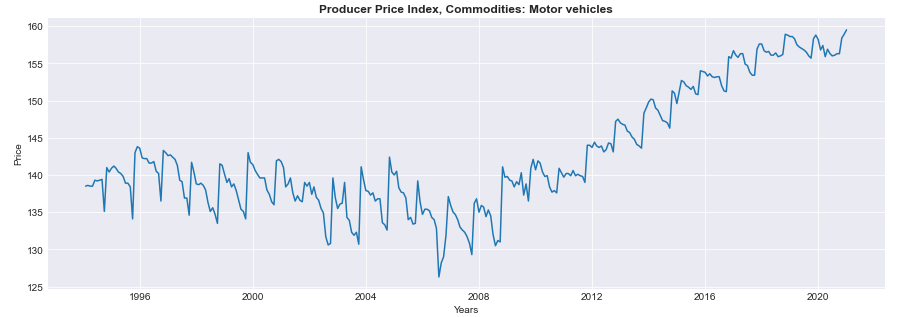

Como podemos ver la serie empieza en el 1994 y sigue hasta el 2020.  A simple vista podemos ya verificar una **componente estacional** en la serie temporal. <br>Esta tiene una baja significativa en el 2008 pero de ahì el repunte ha sido siempre màs hacìa la alta.<br> Dado éste comportamiento no cabe duda que deberemos implementar en la serie una **diferenciaciòn estacional**, los graficos muestran a continuaciòn:

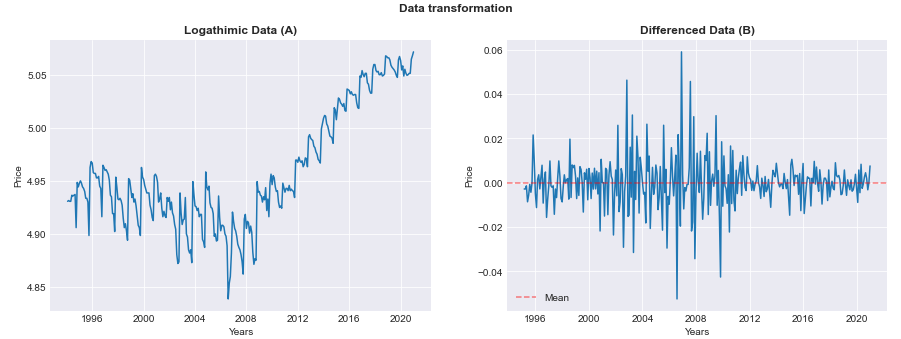

Después de haber implementado una diferencia estacional y regular la serie se muestra estacionaria.

In [ ]:
############# TESTING UNIT ROOT ##########
serie_car <- diff(diff(log(serie2), 12))
summary(ur.df(serie_car, type = 'none',  lags = 0))
summary(ur.pp(serie_car, type = 'Z-tau', lags = 'short',
              model = 'constant'))
summary(ur.kpss(serie_car, type = 'tau', lags = 'short'))

**1.3 Examinaciòn**<br>

**1.3.1 Pruebas formales** de test de raìz unitaria:

|$Prueba$|$Test$ $Statistic$|P-value|$H_0$: The process contains a unit root|
|------|--------------|-------|------|
|Dickey-Fulley|-23.0023|2.2e-16| Rechazada -Rejected|
|PhillipsPerron|-25.784| 2.84e-06|Rechazada -Rejected|

|$Prueba$|$Test$ $Statistic$|P-value|$H_0$: The process is stationary|
|------|--------------|-------|------|
|KPSS|  0.0246|0.855|No rechazada - Not rejected|

En este caso con el filtro *log* $\rightarrow$ *Diferencia estacional* $\rightarrow$ *dif regular*, rechazmos Dickey-Fuller y PhillipsPerron, mientras que no rechazamos KPSS.<br>

**1.3.2 ACF** y **PACF**<br>
Ademas, para establezer el orden, el ACF y el PACF muestran:

In [ ]:
############ PLOTTING ACF AND PACF  ##########
par(mfrow =c(1,2))
Acf(diff(diff(log(serie2),12)), 
    main = 'ACF PLOT CAR INDEX')

Pacf(diff(diff(log(serie2), 12)),
     main = 'PACF PLOT CAR INDEX')

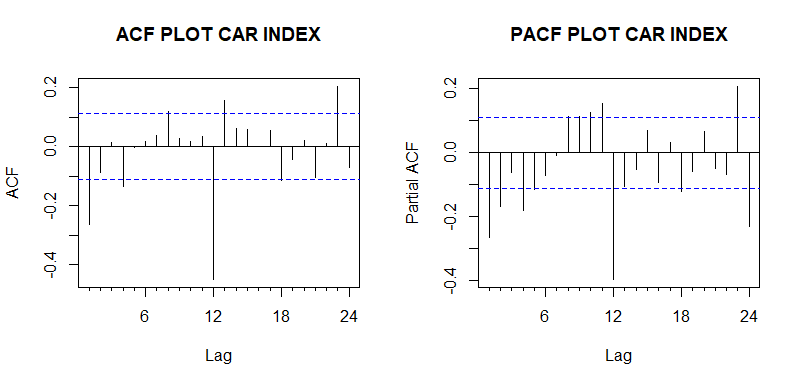

Dos lags estacionales significativos ya sea en el ACF que en el PACF. Dos lags regulares en el PACF y un primer lag regular en el ACF.

<br>**2.1 Estimaciòn**

In [ ]:
car_model1 <- Arima(serie2, order = c(1,1,1),
                    seasonal = c(0, 1, 1),
                    lambda = 0)
car_model1

p_values(car_model1)
checkresiduals(car_model1)

Proponemos 3 modelos.

$MODEL$ $1$

$$𝐴𝑅𝐼𝑀𝐴(1,1,1)(0,1,1)[12]$$

|--|$ar1$| $ma1$  | $  sma1$  | 
|--|---|------|------|
**Parametros**| 0.3285  |-0.6611  |-0.7435|
|s.e.|  0.1118  | 0.0864|   0.0415|
|p-values|0.001649186 |9.767058e-15 |4.895791e-72|

|AIC|AICc|BIC|log-likelihood|Box-Ljung resid (p-val)|
|---|----|---|--------|------|
|**-2064.35**|-2064.22|-2049.39|1036.17|0.09428|


In [ ]:
car_model2 <- Arima(serie2, order = c(2,1,1),
                    seasonal = c(0, 1, 1),
                    lambda = 0)
car_model2

p_values(car_model2)
checkresiduals(car_model2)

$Model$ $2$
$$𝐴𝑅𝐼𝑀𝐴(2,1,1)(0,1,1)[12]$$

|--|$ar1$| $ar2$  | $  ma1$    | $sma1$|
|--|---|------|------|----|
|**Parametros**| 0.3253  |-0.0041|  -0.6572  |-0.7435|
|s.e.|  0.1267 |  0.0739  | 0.1136|   0.0415|
|**p-values**|0.005129763| 0.478081 |3.578693e-09| 4.534204e-72

|AIC|AICc|BIC|log-likelihood|Box-Ljung resid (p-val)|
|---|----|---|--------|------|
|**-2062.35**|-2062.15|-2043.65|1036.17|0.07202|

In [ ]:
car_model4 <- Arima(serie2, order = c(0,1,2),
                    seasonal = c(3, 1, 0),
                    lambda = 0)
car_model4

p_values(car_model4)
checkresiduals(car_model4)

$Model$ $4$
$$𝐴𝑅𝐼𝑀𝐴(2,1,1)(3,1,0)[12]$$

|--|$ma1$| $ma2$  | $  sar1$    | $sar2$| $sar3$|
|--|---|------|------|----|--|
|**Parametros**|-0.3609|  -0.1361 | -0.6918  |-0.4790 | -0.2701|
|s.e.   |0.0566   |0.0586  | 0.0549  | 0.0607  | 0.0539|
|**p-values**|8.871772e-11 |0.01008996| 9.729084e-37| 1.544924e-15| 2.693838e-07

|AIC|AICc|BIC|log-likelihood|Box-Ljung resid (p-val)|
|---|----|---|--------|------|
|**-2055.25**|-2054.97|-2032.81|1033.62|0.01859|

**3.1 Seleciòn**<br>

|MODEL 1|MODEL 2|MODEL 4|
|--------|----|-----|
|𝐴𝑅𝐼𝑀𝐴(1,1,1)(0,1,1)[12]|𝐴𝑅𝐼𝑀𝐴(2,1,1)(0,1,1)[12]|𝐴𝑅𝐼𝑀𝐴(2,1,1)(3,1,0)[12]
|$\checkmark$|$\checkmark$| $\times$|

En este caso destaca el model 1. 

In [ ]:
###### AUTO ARIMA ##########
car_auto <- auto.arima(serie2, lambda = 0)
car_auto

p_values(car_auto)
checkresiduals(car_auto)

**4 Auto.Arima**<br>

$Model$ $Auto.arima$
$$𝐴𝑅𝐼𝑀𝐴(0,1,2)(1,1,1)[12]$$

|--|$ma1$| $ma2$  | $  sar1$    | $sma1$|
|--|---|------|------|----|
|**Parametros**| -0.3337 | -0.1384  |-0.0174 | -0.7338|
|s.e.|   0.0565  | 0.0585 |  0.0757 |  0.0552|
|**p-values**|1.723467e-09 |0.008993312 |0.4092152 |1.356598e-40

|AIC|AICc|BIC|log-likelihood|Box-Ljung resid (p-val)|
|---|----|---|--------|------|
|**-2061.83**|-2061.64|-2043.13|1035.92|0.06526|

También en esta ocasiòn destaca nuestro modelo se diferencia del modelo Auto.arima por:
* **Parsimonia**.
* **AIC** màs bajo.
* **Significacia** de los parametros.<br>

Ademas el parametro, *sar1* referente al **primer orden estacional**, del modelo auto.arima resulta ser **no significativo** como muestra el p-value.

Cabe aùn mencionar que en los modelos 1, 2, y el auto.arima el **NO** se rechaza la hipòtesis nula de *White Noise* sobre los residuos.<br> Aunque el ranking sea màs propicio hacia el 1°, siendo éste el que muestra mayor p-value.

# Conclusiones y consideraciones

Hemos modelizado con *Arima* sobre dos series: una financiera y una macro.<br>
En ambos casos hemos constatado que el mejor modelo era el màs parsimonioso.<br> 

Para la primera Serie:<br>
En particular en **RICI** hemos constatado que el modelo màs adapto es Model 4 cuya formulaciòn es $𝐴𝑅𝐼𝑀𝐴(1,1,0)(0,0,1)[12]$ *vs* $𝐴𝑅𝐼𝑀𝐴(1,1,0)(2,0,0)[12]$
<br> Cabe subrayar el hecho que los **AIC** de MODEL 4 y Auto.arima son bastantes vecinos, respectivamente **-813.2** y **-811.48.**<br>

|RICI|Auto.arima(RICI)|
|----|-----|
|𝐴𝑅𝐼𝑀𝐴(1,1,0)(0,0,1)[12]|𝐴𝑅𝐼𝑀𝐴(1,1,0)(2,0,0)[12]|
|$\checkmark$| $\times$|

Para la segunda Serie:<br>
En esta ocasiòn en **MOTOR** hemos constatado que el modelo màs adapto es Model 1 cuya formulaciòn es $𝐴𝑅𝐼𝑀𝐴(1,1,1)(0,1,1)[12]$ *vs* $𝐴𝑅𝐼𝑀𝐴(0,1,2)(1,1,1)[12]$ <br>
También aqui cabe aùn destacar el hecho que los **AIC** de Model 1 y Auto.arima sean bastante vecinos, respectivamente **-2064.35** y **-2061.83.**

|MOTOR|Auto.arima(MOTOR)|
|----|-----|
|𝐴𝑅𝐼𝑀𝐴(1,1,1)(0,1,1)[12]|𝐴𝑅𝐼𝑀𝐴(0,1,2)(1,1,1)[12]|
|$\checkmark$| $\times$|

# Bibliografia
* ARIMA models for time series forecasting - Duke University. [Apuntes online abiertos](https://people.duke.edu/~rnau/411arim3.htm)
* Forecasting: Principles and Practices. [Texto electronico abierto](https://otexts.com/fpp2/seasonal-arima.html)
* Towards Data Science: Time Series Analysis: Identifying AR and MA using ACF and PACF Plots